# Regressions Excercise

In [2]:
library(car)
library(e1071)
#library(mechkar)

## Linear Regression

In [4]:
df <- read.csv("../data/train.csv")


In [5]:
head(df)


,id,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,1,1,1,0,6,0,2,0.344167,0.363625,0.805833,0.1604460,985
2,2,1,1,0,0,0,2,0.363478,0.353739,0.696087,0.2485390,801
3,3,1,1,0,1,1,1,0.196364,0.189405,0.437273,0.2483090,1349
4,4,1,1,0,2,1,1,0.200000,0.212122,0.590435,0.1602960,1562
5,5,1,1,0,3,1,1,0.226957,0.229270,0.436957,0.1869000,1600
6,6,1,1,0,4,1,1,0.204348,0.233209,0.518261,0.0895652,1606


In [6]:
summary(df)

       id          season           mnth           holiday      
 Min.   :  1   Min.   :1.000   Min.   : 1.000   Min.   :0.0000  
 1st Qu.: 92   1st Qu.:2.000   1st Qu.: 4.000   1st Qu.:0.0000  
 Median :183   Median :3.000   Median : 7.000   Median :0.0000  
 Mean   :183   Mean   :2.499   Mean   : 6.526   Mean   :0.0274  
 3rd Qu.:274   3rd Qu.:3.000   3rd Qu.:10.000   3rd Qu.:0.0000  
 Max.   :365   Max.   :4.000   Max.   :12.000   Max.   :1.0000  
    weekday        workingday       weathersit         temp        
 Min.   :0.000   Min.   :0.0000   Min.   :1.000   Min.   :0.05913  
 1st Qu.:1.000   1st Qu.:0.0000   1st Qu.:1.000   1st Qu.:0.32500  
 Median :3.000   Median :1.0000   Median :1.000   Median :0.47917  
 Mean   :3.008   Mean   :0.6849   Mean   :1.422   Mean   :0.48666  
 3rd Qu.:5.000   3rd Qu.:1.0000   3rd Qu.:2.000   3rd Qu.:0.65667  
 Max.   :6.000   Max.   :1.0000   Max.   :3.000   Max.   :0.84917  
     atemp              hum           windspeed            cnt      


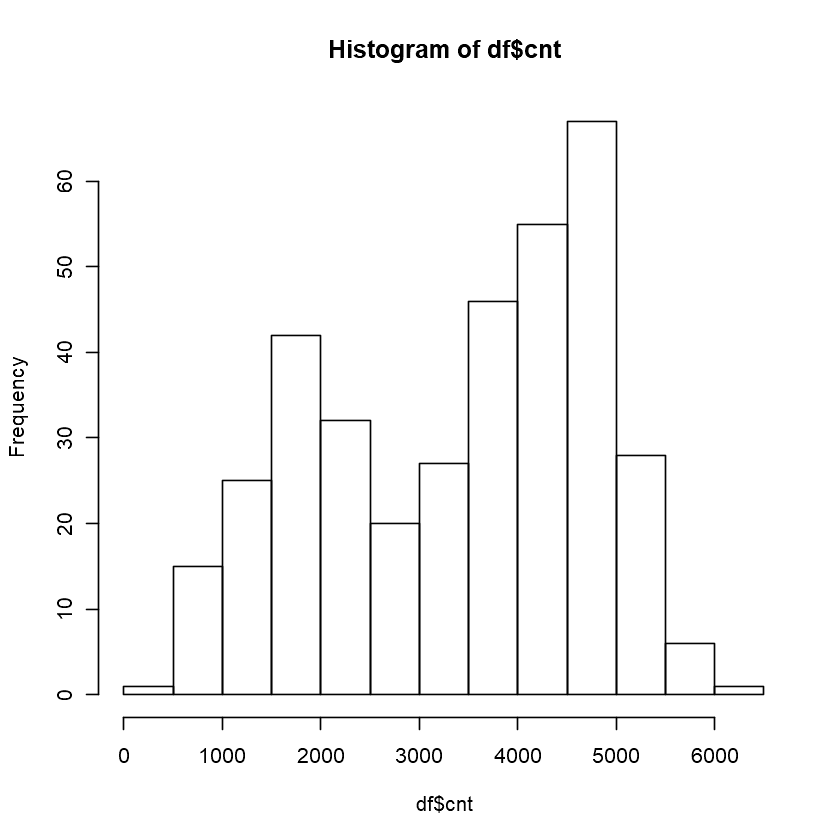

In [7]:
hist(df$cnt)

In [8]:
mod1 <- lm(cnt ~. ,data=df)
summary(mod1)


Call:
lm(formula = cnt ~ ., data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-2520.61  -375.56    48.21   401.97  1996.58 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1586.234    270.653   5.861 1.06e-08 ***
id             -7.707      4.099  -1.880   0.0609 .  
season        363.609     60.459   6.014 4.52e-09 ***
mnth          236.799    126.553   1.871   0.0622 .  
holiday      -298.801    229.162  -1.304   0.1931    
weekday        24.154     18.136   1.332   0.1838    
workingday     22.472     80.391   0.280   0.7800    
weathersit   -557.394     84.697  -6.581 1.69e-10 ***
temp         5067.637   2378.642   2.130   0.0338 *  
atemp        -512.825   2689.788  -0.191   0.8489    
hum          -494.670    335.633  -1.474   0.1414    
windspeed   -2192.438    518.787  -4.226 3.03e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 684.6 on 353 degrees of freedom
Multiple R-squ

In [15]:
vif(mod1)

id     season       mnth    holiday    weekday workingday weathersit 
145.282323   3.503901 148.278687   1.089846   1.028193   1.086191   1.821864 
      temp      atemp        hum  windspeed 
157.965390 160.181179   1.935782   1.235853

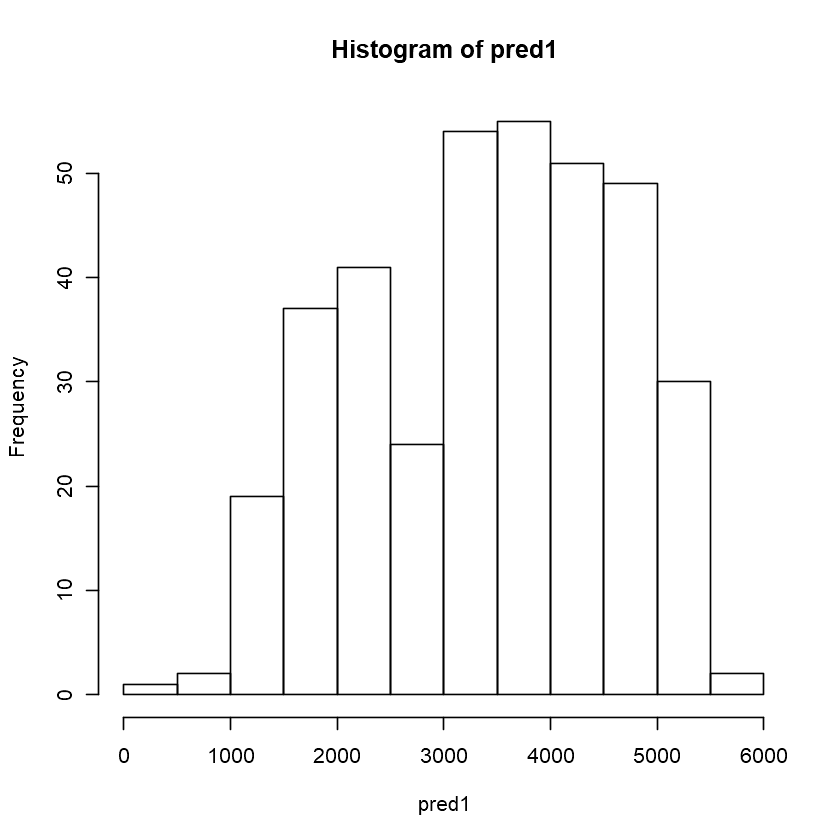

In [16]:
pred1 <- predict(mod1, newdata=df)
hist(pred1)

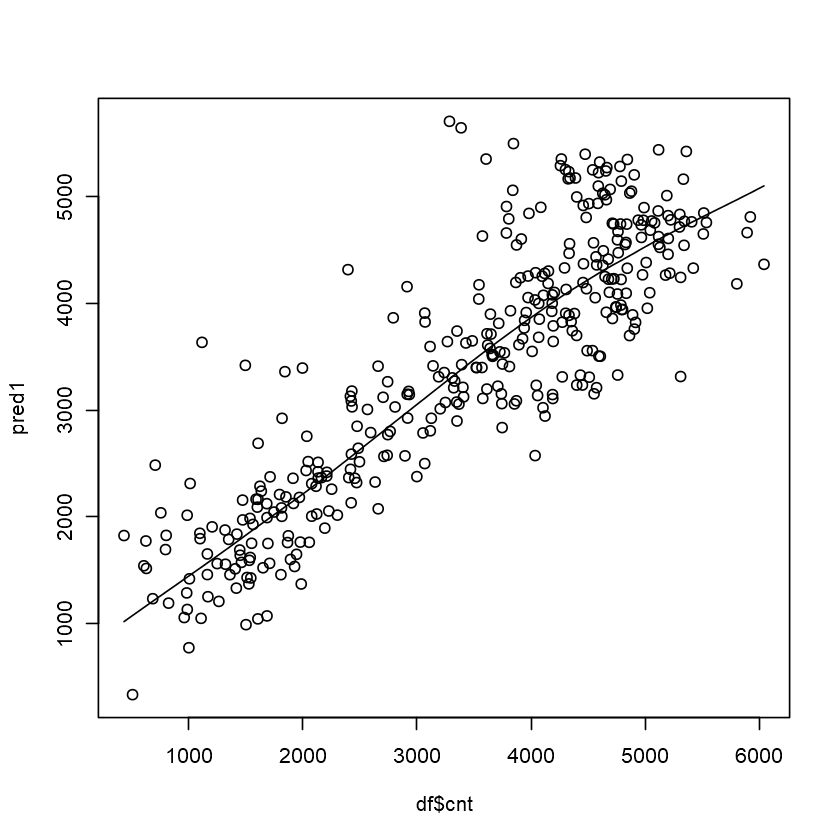

In [17]:
scatter.smooth(pred1 ~ df$cnt)


In [18]:
head(pred1)

1        2        3        4        5        6 
2016.320 1827.768 1790.015 1930.436 2092.290 2165.325

## Logistic Regression

## Naive Bayes Regression

In [19]:
mod3 <- naiveBayes(donate_2007 ~., data=bd) # baisianic 
mod3


Naive Bayes Classifier for Discrete Predictors

Call:
naiveBayes.default(x = X, y = Y, laplace = laplace)

A-priori probabilities:
Y
        0         1 
0.7620321 0.2379679 

Conditional probabilities:
   time_since_last
Y        [,1]     [,2]
  0 10.771930 8.425039
  1  5.455056 5.170615

   donate_times
Y       [,1]     [,2]
  0 4.801754 4.746768
  1 7.797753 8.036892

   blood_total_cc
Y       [,1]     [,2]
  0 1200.439 1186.692
  1 1949.438 2009.223

   time_since_first
Y       [,1]     [,2]
  0 34.77018 24.60539
  1 32.71910 23.62943


0,1
2.614048e-27,1.0000000
2.396895e-01,0.7603105
4.178844e-02,0.9582116
1.459464e-03,0.9985405
2.433045e-05,0.9999757
8.258225e-01,0.1741775


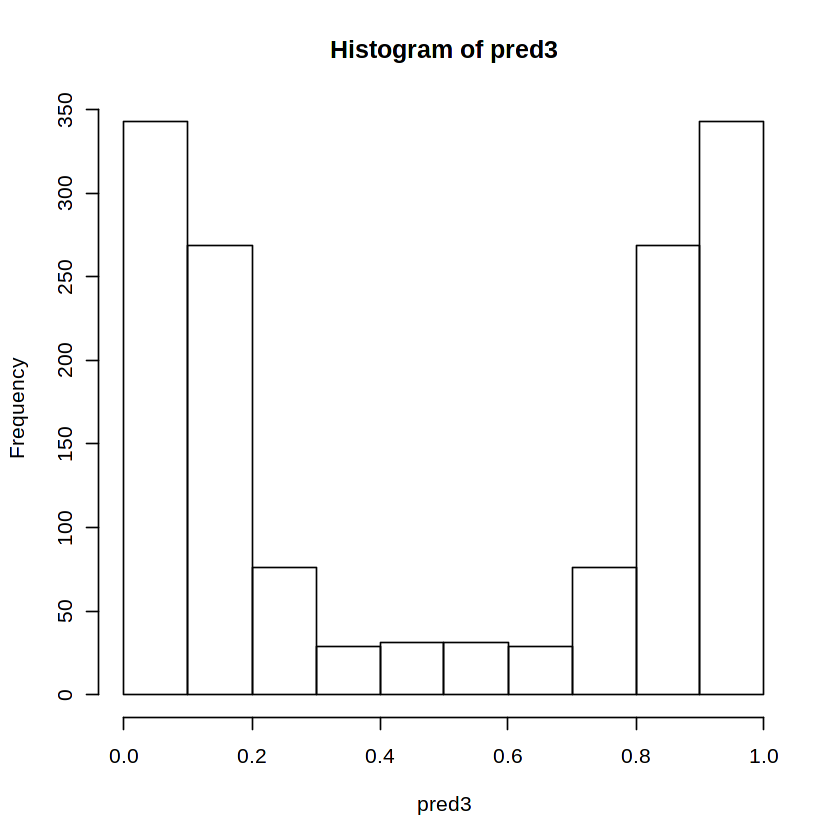

In [20]:
pred3 <- predict(mod3, newdata=bd, type="raw")# when we look at the firs table of the prediction is the prediction to be 0 or 1 and it complamentary. and we should take only the 1
head(pred3)
hist(pred3)

In [32]:
pred_cat3 <- ifelse(pred3[,2] >= 0.5,1,0)
table(pred_cat3)

pred_cat3
  0   1 
672  76 

In [34]:
table(pred=pred_cat3, obs=bd$donate_2007) # this table tell as the fals positive/negativ and the true negative/positive

    obs
pred   0   1
   0 528 144
   1  42  34

In [35]:
paste("Accuracy: ", ((528+34)/nrow(bd))) # accuracy of 75% is not so good

[1] "Accuracy:  0.751336898395722"